<a href="https://colab.research.google.com/github/SusanaSernaJaramillo/Data-Intregration/blob/main/RETO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GESTIÓN DEL RIESGO OPERACIONAL - FALLAS TECNOLÓGICAS EN CANALES ELECTRÓNICOS**

En este análisis, se estudiarán las fallas tecnológicas asociadas a las operaciones de las Fintechs.
Estas Fintechs operan en canales electrónicos, y es común que experimenten fallos en las transacciones.
Los datos que se utilizarán provienen de registros históricos de fallos, y el objetivo es realizar una
caracterización del riesgo operacional a través del análisis de dos parámetros clave: la Frecuencia y la Severidad.

- Frecuencia: Se refiere al número de fallos tecnológicos que ocurren en un período específico (por ejemplo,
por semana o por mes).

 - Severidad: Representa el costo promedio de las pérdidas generadas por cada fallo.

 El análisis se realizará utilizando el enfoque de Distribución Agregada de Pérdidas (LDA), el cual calcula las pérdidas totales a partir del producto de la frecuencia y la severidad.
 Posteriormente, se realizarán análisis estadísticos para obtener las medidas de tendencia central
 (media, varianza, desviación estándar) y medidas de dispersión (asimetría y kurtosis) que ayudarán a comprender la naturaleza y el comportamiento de los riesgos asociados.

Procedemos a realizar los siguientes pasos:

1. Cargar los datos de las fallas tecnológicas.
2. Calcular la distribución agregada de pérdidas (LDA).
3. Visualizar la distribución de las pérdidas.
4. Realizar una clusterización estadística.
5. Calcular y analizar las métricas estadísticas de tendencia central y dispersión.



In [1]:
# Paso 1: Importar las librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns # Esta es la liberia para el trabajo estadístico
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Se cargan Archivos de Trabajo

In [2]:
nxl='/content/drive/MyDrive/Integración de datos/Bases de datos/1. FallasTecnológicas.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0, header=1)
XDB.head(10)

,Fechas,Transacciones Diarias,Valor Transado (millones),Transacciones Fallidas (Freq),Valor Generado Promedio (Millones),Descripción Evento
0,2009-01-01,80,14.8058,1,0.5374,"Errores visuales menores, problemas de usabili..."
1,2009-01-02,105,56.4721,4,1.1978,"Errores en la interfaz de usuario, fallas en f..."
2,2009-01-03,70,9.9760,5,0.4269,"Errores visuales menores, problemas de usabili..."
3,2009-01-04,105,18.2949,6,1.0814,"Errores en la interfaz de usuario, fallas en f..."
4,2009-01-05,130,23.4112,7,1.2105,"Errores en la interfaz de usuario, fallas en f..."
5,2009-01-06,100,31.5177,3,0.2363,"Errores visuales menores, problemas de usabili..."
6,2009-01-07,115,29.5603,1,0.2737,"Errores visuales menores, problemas de usabili..."
7,2009-01-08,90,36.4063,8,12.4245,"Caída total del sistema por más de 24 horas, p..."
8,2009-01-09,105,9.3552,1,2.3869,"Degradación del rendimiento por varias horas, ..."
9,2009-01-10,85,23.7019,7,0.3098,"Errores visuales menores, problemas de usabili..."


*Distribución Agregada de Pérdidas (LDA)*

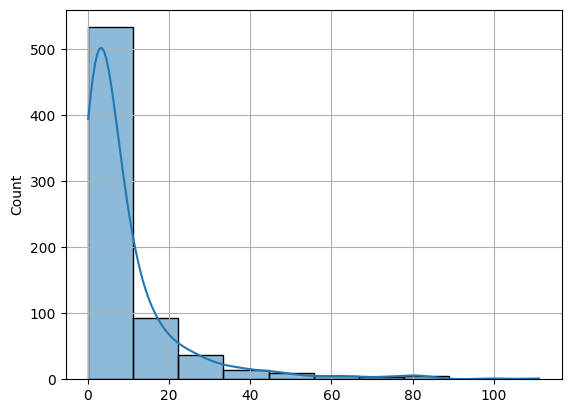

In [3]:

# Seleccionamos las columnas de Frecuencia y Severidad por su índice
Freq = XDB.iloc[:, 3]  # Columna de "Transacciones Fallidas (Freq)"
Sev = XDB.iloc[:, 4]   # Columna de "Valor Generado Promedio (Millones)"


LDA = Freq * Sev

plt.figure()
sns.histplot(LDA, bins=10, kde=True)
plt.grid()
plt.show()


*Clusteización estadística*

In [5]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

NI = 10  # Indica el número de clusters
counts, bin_edges = np.histogram(LDA, bins=NI)

# Número de datos por intervalo
print("El número de datos por intervalo es:")
print(counts)

# Intervalos inferiores
print("Los Intervalos Inferiores:")
print(bin_edges[:-1])

# Intervalos superiores
print("Los Intervalos Superiores:")
print(bin_edges[1:])

# intervalos centrales
XC = (bin_edges[1:] + bin_edges[:-1]) / 2


print("Los intervalos centrales son:")
print(XC)

# Tabla de datos
Tabla = np.column_stack((bin_edges[1:], bin_edges[1:], XC, counts))

# DataFrame
df = pd.DataFrame(Tabla, columns=['Intervalo Inferior', 'Intervalo Superior', 'Intervalo Central', 'ND'])

display(df)

El número de datos por intervalo es:
[533  93  37  14   9   5   3   5   1   1]
Los Intervalos Inferiores:
[ 0.14 11.24 22.33 33.42 44.52 55.61 66.71 77.8  88.89 99.99]
Los Intervalos Superiores:
[ 11.24  22.33  33.42  44.52  55.61  66.71  77.8   88.89  99.99 111.08]
Los intervalos centrales son:
[  5.69  16.78  27.88  38.97  50.07  61.16  72.25  83.35  94.44 105.54]


,Intervalo Inferior,Intervalo Superior,Intervalo Central,ND
0,11.23637,11.23637,5.689335,533.0
1,22.33044,22.33044,16.783405,93.0
2,33.42451,33.42451,27.877475,37.0
3,44.51858,44.51858,38.971545,14.0
4,55.61265,55.61265,50.065615,9.0
5,66.70672,66.70672,61.159685,5.0
6,77.80079,77.80079,72.253755,3.0
7,88.89486,88.89486,83.347825,5.0
8,99.98893,99.98893,94.441895,1.0
9,111.08300,111.08300,105.535965,1.0


*Se calculan las métricas estadísticas de tendencia central y dispersión: Media, Desviación, Asimetría y Kurtosis*

In [8]:

from numpy._core.fromnumeric import var
# MEDIA
u = np.mean(LDA)  # Media de LDA
# VARIANZA
var = np.var(LDA)  # Varianza de LDA
# DESVIACIÓN ESTÁNDAR
sigma = np.std(LDA)  # Desviación estándar de LDA
T2 = np.column_stack((u, var, sigma))

# Convertimos la tabla a un DataFrame
df2 = pd.DataFrame(T2, columns=['Media', 'Varianza', 'Desviación'])
df2.head()

,Media,Varianza,Desviación
0,9.451113,187.894776,13.707472


In [9]:
# Importamos las funciones necesarias
from scipy.stats import skew, kurtosis

# Calculamos Asimetría (Skewness) y Kurtosis
SK = skew(LDA)
KUR = kurtosis(LDA)
df2_temp = df2.copy()
# Agregamos los resultados de Asimetría y Kurtosis al DataFrame
df2_temp['Asimetría'] = SK
df2_temp['Kurtosis'] = KUR
display(df2_temp)


,Media,Varianza,Desviación,Asimetría,Kurtosis
0,9.451113,187.894776,13.707472,3.34836,14.167714


**Análisis de Resultados:**

A partir de las métricas de tendencia central y dispersión, podemos observar que, en general, las pérdidas tienden a ubicarse por debajo de la media, como lo indica el coeficiente de asimetría de 3.35. Esto nos sugiere que, en su mayoría, los fallos tecnológicos generan pérdidas menores, lo cual es común en sistemas tecnológicos donde la mayoría de los incidentes suelen ser de bajo impacto, como errores visuales o fallas menores. Sin embargo, también hay eventos con pérdidas mucho mayores, como caídas del sistema o ciberataques, lo que indica una alta variabilidad en los datos. Esta variabilidad significa que, aunque la mayoría de los eventos son menores, la empresa está expuesta a riesgos de eventos raros pero graves, los cuales pueden tener consecuencias mucho más grandes.

En cuanto a la curtosis, con un valor de 14.17, podemos ver que los datos están muy concentrados al lado izquierdo de la media, lo que se refleja claramente en la gráfica del histograma de frecuencias.

En resumen, aunque la mayoría de las pérdidas derivadas de fallas tecnológicas son menores y relativamente comunes, el alto coeficiente de asimetría y la alta curtosis indican que la empresa está expuesta a eventos extremos, los cuales, aunque no son frecuentes, pueden tener un gran impacto financiero. Esto resalta la necesidad de que la empresa prepara un plan de mitigación robusto para estos eventos poco frecuentes, pero con un alto impacto cuando se presentan. Si la empresa no se anticipa a estos eventos, las consecuencias podrían ser mucho más graves de lo esperado.